In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city",how = "outer")

# Display the data table for preview
pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

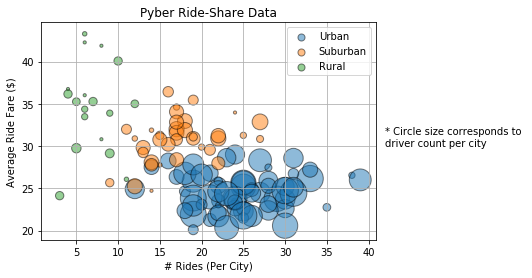

In [3]:
# Obtain the x and y coordinates for each of the three city types
citype_df = pyber_df[["city","fare","driver_count","type"]]

# === URBAN ===
urban_df = pyber_df.loc[pyber_df["type"] == "Urban"]
urban_group = urban_df.groupby("city")
urban_x = pd.DataFrame(urban_group["fare"].count()) #total # of rides/city
urban_y = pd.DataFrame(urban_group["fare"].mean()) #avg fare
urban_z = pd.DataFrame(urban_group["driver_count"].mean()) #driver count

# === SUBURBAN ===
subrb_df = pyber_df.loc[pyber_df["type"] == "Suburban"]
subrb_group = subrb_df.groupby("city")
subrb_x = pd.DataFrame(subrb_group["fare"].count()) #total # of rides/city
subrb_y = pd.DataFrame(subrb_group["fare"].mean()) #avg fare
subrb_z = pd.DataFrame(subrb_group["driver_count"].mean()) #driver count

# === RURAL ===
rural_df = pyber_df.loc[pyber_df["type"] == "Rural"]
rural_group = rural_df.groupby("city")
rural_x = pd.DataFrame(rural_group["fare"].count()) #total # of rides/city
rural_y = pd.DataFrame(rural_group["fare"].mean()) #avg fare
rural_z = pd.DataFrame(rural_group["driver_count"].mean()) #driver count

# Build the scatter plots for each city types
scl = 10. #scatterplot scale variable
sz = 50. #legend scale variable

plt.figure()
plt.grid()
plt.scatter(urban_x,urban_y,s=urban_z*scl,edgecolors='k',alpha = 0.5)
plt.scatter(subrb_x,subrb_y,s=subrb_z*scl,edgecolors='k',alpha = 0.5)
plt.scatter(rural_x,rural_y,s=rural_z*scl,edgecolors='k',alpha = 0.5)

# Incorporate the other graph properties
plt.title("Pyber Ride-Share Data")
plt.xlabel("# Rides (Per City)")
plt.ylabel("Average Ride Fare ($)")

# Create a legend
lgnd = plt.legend(["Urban","Suburban","Rural"])#,markerscale = 2.)
lgnd.legendHandles[0]._sizes = [sz] #looked up so I can define exactly how big I want my legend markers
lgnd.legendHandles[1]._sizes = [sz]
lgnd.legendHandles[2]._sizes = [sz]

# Incorporate a text label regarding circle size
plt.text(42,30,"* Circle size corresponds to \ndriver count per city")

# Save Figure
plt.savefig("Results/BubRideShare.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

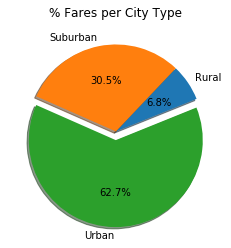

In [4]:
# Calculate Type Percents
pie1_df = pyber_df[["fare","type"]]
fbt_df = pie1_df.groupby("type")
fbt_res = pd.DataFrame(fbt_df["fare"].sum())
lab = ["Rural","Suburban","Urban"] #label array for following pie charts
explode = (0,0,0.1) #explode tuple corresponding to above labels

# Build Pie Chart
plt.figure()
plt.pie(fbt_res["fare"],labels = lab,explode = explode,autopct = "%1.1f%%",shadow=True,startangle = 22)
plt.title("% Fares per City Type")

# Save Figure
plt.savefig("Results/FarebyCity.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

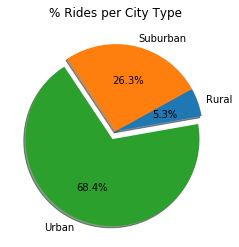

In [6]:
# Calculate Ride Percents
pie2_df = pyber_df[["ride_id","type"]]
rbt_df = pie2_df.groupby("type")
rbt_res = pd.DataFrame(rbt_df["ride_id"].count())

# Build Pie Chart
plt.figure()
plt.pie(rbt_res["ride_id"],labels = lab,explode = explode,autopct = "%1.1f%%",shadow=True,startangle = 10)
plt.title("% Rides per City Type")

# Save Figure
plt.savefig("Results/RidebyCity.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

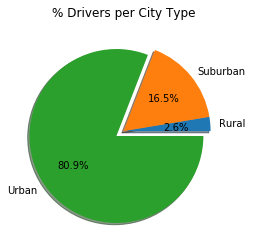

In [8]:
# Calculate Driver Percents
pie3_df = pyber_df[["city","driver_count","type"]].copy()
pie3_df.drop_duplicates(subset = "city",keep = 'first', inplace = True)
dbt_df = pie3_df.groupby("type")
dbt_res = pd.DataFrame(dbt_df["driver_count"].sum())

# Build Pie Charts
plt.figure()
plt.pie(dbt_res["driver_count"],labels = lab,explode = explode,autopct = "%1.1f%%",shadow=True)
plt.title("% Drivers per City Type")

# Save Figure
plt.savefig("Results/DriverbyType.png")

In [9]:
# Show Figure
plt.show()

# Trends:

## 1 - Fare Breakdown
Our fares seem to have a negative relationship with our number of rides. This suggests that long distance trips (most of which are Urban as seen in our scatter plot) happen very infrequently. These Rural cities tend to have far fewer drivers than the average drivers for Urban and Suburban areas, but they also have far fewer rides than the other two as well. Urban riders tend to have the most drivers and riders, though the average fares tend to be smaller. Distance can be a factor in both of these cases, as some Rural drivers may traverse longer distances than Urban drivers. Shorter distances would cause smaller fares, and longer distances would cause larger fares.

## 2 - Our Demographic
When analyzing our data, we find that Urban areas make up a large majority of Pyber income, accounting for 62.7% of profits. Suburban (16.5%) and Rural (2.6%) account for far less, though it could be that those areas aren't as conducive to ride-sharing. It could be that the Rural areas are large farmlands or these areas tend to have a larger driving population than the Urban or Suburban areas, harkening back to the distance issue mentioned in the first point.

## 3 - Our Drivers and Riders
When thinking about how many rides we receive per city type, we also note that a majority of our drivers (80.9%) are in Urban areas as well. Naturally, more drivers means more rides per type (68.4%). With this in mind, it's no surprise that the sheer volume of rides in Urban areas, though they may be shorter with lower average fares, accounts for the greater total fare percentage.